## Computational Finance and FinTech – Exercises 3

__Exercise 1.__ Write a program that plots lines of different line styles. The output should look
something like this:    
__Exercise 2.__ In this exercise we consider the pricing of a European call option in the BlackScholes model. “European” in this context means that the option can be exercised only at
maturity. A call option with strike $K$ gives the owner the right, but not the obligation to
purchase a share of stock for a price of $K$. Hence, the payoff of the call option at maturity $T$ is
$C_{K,T} = max(S_{T} − K, 0)$  
where $S_{T}$ is the stock price at maturity.
The Black-Scholes model assumes that a stock’s log-returns are normally distributed. In this
model the price of a call option at time $t = 0$ with current stock price $S_{0}$ is given by the
Black-Scholes formula:  
 <div align='center'>$C(0,S_{0})= S_{0}N(d_{+}) - e^{-rT}KN(d_{-})$</div>
with $d\pm = \frac{ln(S_{0}/K)+ (r\pm\frac{1}{2}σ^2)T}{σ\sqrt{T}}$    
where $N(x)$ is the cumulative distribution function of the standard normal distribution.
The parameters are $K$: strike price, $T$: maturity, $r$: risk-free interest rate and $σ$: volatility.  
(a) Write a function that calculates the Black-Scholes price of a European call option on a
stock with price process $(S_{t})_{t≥0}$.  
(b) Generate a plot that shows both the option payoff (as a function of $S_{T}$ ) and the BlackScholes price (as a function of the stock price $S_{0}$) at maturity $T$. The parameters are
$K = 100, σ = 20%, T = 1, r = 1%$.    
(Hint: Use from scipy.stats import norm to access the normal distribution function.)      
__Exercise 3.__ Load the data from *tr_eikon_eod_data.csv*. Create a data frame with log-returns
and a data frame with discrete returns. Calculate the correlations of the log-returns with the
discrete returns. Plot the respective returns in scatter plots. What can you conclude about
daily returns?

### Exercise 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np

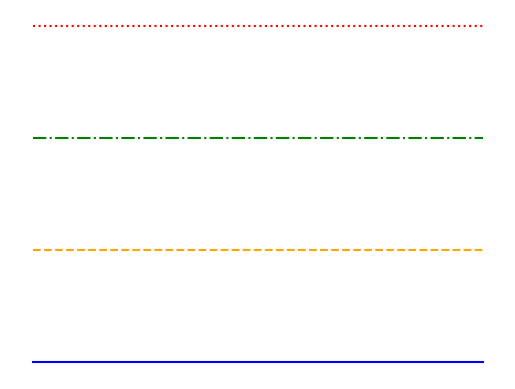

In [2]:
linestyles = [':','-.','--','-']
colors = ['red','green','orange','blue']
plt.axis('off')
for i in range(4):
    plt.plot(np.ones(10) * (5-i),ls=linestyles[i],color=colors[i])

### Exercise 2

In [3]:
import math
from scipy.stats import norm

def black_scholes_call(S0, K, T, r, sigma):
    d1 = (math.log(S0/K) + (r + 0.5*sigma**2)*T) / (sigma*math.sqrt(T))
    d2 = d1 - sigma*math.sqrt(T)
    call_price = S0*norm.cdf(d1) - K*math.exp(-r*T)*norm.cdf(d2)
    return call_price

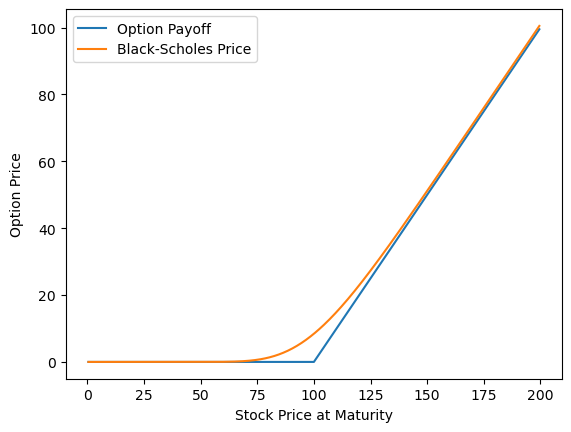

In [4]:
import numpy as np
import matplotlib.pyplot as plt

K = 100
sigma = 0.2
T = 1
r = 0.01

ST = np.arange(0.5, 200, 0.5)
payoff = np.maximum(ST - K, 0)
bs_price = [black_scholes_call(S0, K, T, r, sigma) for S0 in ST]

plt.plot(ST, payoff, label='Option Payoff')
plt.plot(ST, bs_price, label='Black-Scholes Price')
plt.legend()
plt.xlabel('Stock Price at Maturity')
plt.ylabel('Option Price')
plt.show()

In [5]:
round(black_scholes_call(S0=100,K=95,T=2,sigma=0.21,r=0.037),4)

17.9632

In [9]:
round(black_scholes_call(S0=100,K=102.5,T=2,sigma=0.24,r=0.036),4)

15.6012

### Exercise 3

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

AAPL.O    0.999786
MSFT.O    0.999764
INTC.O    0.999835
AMZN.O    0.999513
GS.N      0.999763
SPY       0.999931
.SPX      0.999929
.VIX      0.992099
EUR=      0.999985
XAU=      0.999912
GDX       0.999753
GLD       0.999904
dtype: float64


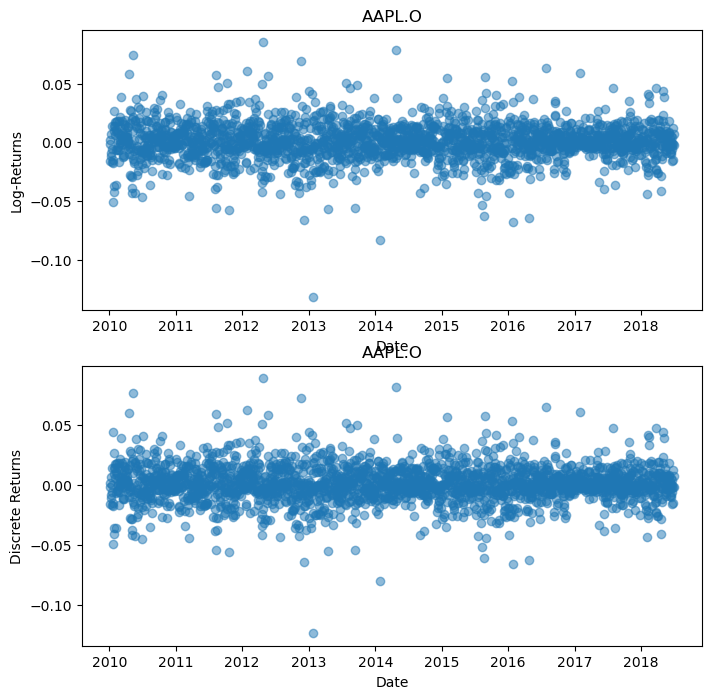

In [16]:
import pandas as pd
import numpy as np

# Load data from csv file
data = pd.read_csv('./data/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)

# Calculate log-returns
log_returns = np.log(data / data.shift(1))
# log_returns.dropna(inplace=True)

# Calculate discrete returns
discrete_returns = data.pct_change()
# discrete_returns.dropna(inplace=True)

# Calculate correlation between log-returns and discrete returns
corr = log_returns.corrwith(discrete_returns)
print(corr)
# Plot scatter plots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].scatter(data.index, log_returns['AAPL.O'], alpha=0.5)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Log-Returns')
axs[0].set_title('AAPL.O')
axs[1].scatter(data.index, discrete_returns['AAPL.O'], alpha=0.5)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Discrete Returns')
axs[1].set_title('AAPL.O')
plt.show()
